## Project Title: 

### Leveraging Data Insights for Sales Optimization in 2019

## 1. Business Understanding


### Project Description
### 1. Introduction
In this project, we aim to design and deliver an end-to-end business intelligence solution leveraging transactional data from 2019 to provide valuable insights for our client. The client has collected data throughout the year but hasn't utilized it effectively to drive sales and improve operational efficiency. Our goal is to analyze the data comprehensively and present actionable insights that will enable the client to identify opportunities for growth and optimization.

### 1.1. Objectives
The main objectives of this project are as follows:

- Analyze the 2019 transactional data to determine the total revenue generated throughout the year.

- Identify any seasonal patterns or trends in sales to understand the seasonality of the business.

- Determine the best-selling and worst-selling products based on sales volume and revenue.

- Compare sales performance across different months or weeks to identify trends and fluctuations.

- Analyze the distribution of product deliveries across cities to identify key markets.

- Compare product categories in terms of revenue generated and quantities ordered to understand their contribution to overall sales.

### 1.2. Analytical  Questions
1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered?

### 1.3. Hypothesis
- Null Hypothesis (H0): The total revenue generated in 2019 is equal to or less than a predetermined benchmark or expectation.

- Alternative Hypothesis (H1): The total revenue generated in 2019 is greater than the predetermined benchmark or expectation.

### 1.4. Methodology
To achieve these objectives, we will follow a systematic methodology that includes the following steps:

1. Data Collection: Retrieve transactional data for the entire year of 2019 from both CSV files (January to June) and the remote database (July to December).

2. Data Preprocessing: Clean and preprocess the data to handle missing values, outliers, and inconsistencies.

3. Exploratory Data Analysis (EDA): Conduct exploratory data analysis to gain insights into the distribution, trends, and patterns within the data.

4. Statistical Analysis: Perform statistical analysis to answer specific questions such as total revenue, seasonal trends, best-selling products, etc.

6. Data Visualization: Visualize the findings using charts, graphs, and tables to facilitate understanding and interpretation.

7. Interpretation and Insights: Provide actionable insights and recommendations based on the analysis to help the client make informed decisions.

8. Report Generation: Prepare a comprehensive report summarizing the analysis, findings, and recommendations for the client's reference.


By following this methodology, we aim to deliver a robust business intelligence solution that empowers our client to optimize sales strategies, identify growth opportunities, and enhance operational efficiency.

## 2.Data Understanding

####  Features
1. Order ID	- This feature represents a unique identifier for each order.
2. Product	- This feature represents the name or type of product ordered.
3. Quantity Ordered	- This feature represents the quantity of each product ordered
4. Price Each - This feature represents the price of each product.
5. Order Date - This feature represents the date and time when the order was placed
6. Purchase Address - This feature represents the address where the purchase was made


#### Numerical features
1. Quantity Ordered
2.  Price Each

#### Categorical features
1.  Order ID
2. Product
3. Purchase Address

#### Date features
1. Order Date

Installing libraries and Packages


In this section we will import all the packages/libraries that we will be using through this project

### Importation


In [1]:
# Data Handling
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np  # For numerical operations and arrays
import pyodbc  # For handling connections to Microsoft SQL Server
from dotenv import dotenv_values  # For loading environment variables, possibly including database credentials
import os

# Statistical Analysis
import math  # Basic mathematical operations

# Warning Handling
import warnings  # To handle warnings in a way that they can be ignored
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

##  Load Dataset

### 1. Load First Dataset (CSV Dataset)

In [2]:

# Directory path where CSV files for January to June are located
directory_path = r"../data"

# List of file names for each month
file_names = [
    "Sales_January_2019.csv",
    "Sales_February_2019.csv",
    "Sales_March_2019.csv",
    "Sales_April_2019.csv",
    "Sales_May_2019.csv",
    "Sales_June_2019.csv"
]

# Generate file paths for each month
file_paths = [os.path.join(directory_path, file_name) for file_name in file_names]

# Load CSV files into separate DataFrames
data_frames = [pd.read_csv(file) for file in file_paths]

# Combine DataFrames into a single DataFrame
first_half_data = pd.concat(data_frames, ignore_index=True)

# View first half of the dataset
first_half_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### 2. Load Second Dataset (from remote SQL Database)

In [3]:
# Load environment variables from .env file into a dictionary
config = dotenv_values("../.env")

# Get the values for the credentials set in the '.env' file
server = config.get("SERVER")
database = config.get("DATABASE")
username = config.get("USERNAME")
password = config.get("PASSWORD")

# Connection string
connection_string = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Establish a connection
connection = pyodbc.connect(connection_string)

In [4]:
# Define SQL queries
sql_queries = [
    'SELECT * FROM dbo.Sales_August_2019',
    'SELECT * FROM dbo.Sales_July_2019',
    'SELECT * FROM dbo.Sales_September_2019',
    'SELECT * FROM dbo.Sales_October_2019',
    'SELECT * FROM dbo.Sales_November_2019',
    'SELECT * FROM dbo.Sales_December_2019'
]

# Execute queries and fetch data into DataFrames
data_frames = []
for sql_query in sql_queries:
    df = pd.read_sql(sql_query, connection)
    data_frames.append(df)

# Combine DataFrames into a single DataFrame
second_half_data = pd.concat(data_frames, ignore_index=True)

# View second half of the dataset
second_half_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00,"736 14th St, New York City, NY 10001"


# Exploratory Data Analysis (EDA)

## Data Exploration for the First half of the dataset 

In [5]:
# Display basic information about the first dataset
first_half_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


In [10]:
f'There are {first_half_data.shape[0]} rows and {first_half_data.shape[1]} columns in the first dataset.'

'There are 85625 rows and 6 columns in the first dataset.'

In [11]:
# Checking missing values for First dataset
first_half_data.isnull().sum()

Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64

In [12]:
# View the rows with misisng values to confirm the inconsistency
columns_to_check = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
missing_values = first_half_data[columns_to_check].isnull().any(axis=1)
rows_with_missing_values = first_half_data[missing_values]
rows_with_missing_values.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
1491,NaN,NaN,NaN,NaN,NaN,NaN
1699,NaN,NaN,NaN,NaN,NaN,NaN
3047,NaN,NaN,NaN,NaN,NaN,NaN
3082,NaN,NaN,NaN,NaN,NaN,NaN
3584,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Check unique values in the product column
first_half_data['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [13]:
first_half_data[first_half_data['Product'] == 'Product']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
82446,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
82787,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
82816,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
83050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
# Check for duplicated rows
first_half_data.duplicated().sum()

511

- The first six months all the columns are are in the object data types
- Quantity Ordered and Price Each column they are stored as an object, which is unexpected as they are representing a numerical quantity. Instead it should typically be stored as an integer or float data type.
- Order Date feature is also stored as an object, which is unexpected for a date and time feature. It should be converted to a datetime data type for easier manipulation and analysis.
- From the dataframe above we observe that all the rows with missing values do not have any value in either of the columns hence there is the need for us to drop the missing values.
- The Product column has values Product which is associated with invalid input as values in the other columns hence we must drop the rows from the dataset.
- There are 511 duplicated rows in the dataset which we will keep first occurence and drop other occurence.

### 2. Load Second Dataset (from remote SQL database)

## Data Exploration for the second half of the dataset 

In [15]:
# Display basic information about the second dataset
second_half_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101225 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          100730 non-null  float64       
 1   Product           100925 non-null  object        
 2   Quantity_Ordered  100730 non-null  float64       
 3   Price_Each        100730 non-null  float64       
 4   Order_Date        100730 non-null  datetime64[ns]
 5   Purchase_Address  100925 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 4.6+ MB


In [17]:
f'There are {second_half_data.shape[0]} rows and {second_half_data.shape[1]} columns in the second dataset.'

'There are 101225 rows and 6 columns in the second dataset.'

In [18]:
# Checking missing values for Second dataset
second_half_data.isnull().sum()

Order_ID            495
Product             300
Quantity_Ordered    495
Price_Each          495
Order_Date          495
Purchase_Address    300
dtype: int64

In [19]:
# View the rows with misisng values to confirm the inconsistency
columns_to_check = ['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 'Purchase_Address']
missing_values = second_half_data[columns_to_check].isnull().any(axis=1)
rows_with_missing_values = second_half_data[missing_values]
rows_with_missing_values.head(50)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
211,NaN,Product,NaN,NaN,NaT,Purchase Address
243,NaN,Product,NaN,NaN,NaT,Purchase Address
312,NaN,None,NaN,NaN,NaT,None
1222,NaN,None,NaN,NaN,NaT,None
1291,NaN,Product,NaN,NaN,NaT,Purchase Address
1412,NaN,Product,NaN,NaN,NaT,Purchase Address
1427,NaN,Product,NaN,NaN,NaT,Purchase Address
1729,NaN,Product,NaN,NaN,NaT,Purchase Address
2304,NaN,Product,NaN,NaN,NaT,Purchase Address
2482,NaN,Product,NaN,NaN,NaT,Purchase Address


In [20]:
# Check unique values in the product column
second_half_data['Product'].unique()

array(['Wired Headphones', 'Bose SoundSport Headphones', 'iPhone',
       'AA Batteries (4-pack)', '34in Ultrawide Monitor', '20in Monitor',
       'Macbook Pro Laptop', 'LG Washing Machine', '27in FHD Monitor',
       'Lightning Charging Cable', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'USB-C Charging Cable',
       '27in 4K Gaming Monitor', 'ThinkPad Laptop', 'Flatscreen TV',
       'Google Phone', 'Vareebadd Phone', 'Product', None, 'LG Dryer'],
      dtype=object)

In [22]:
second_half_data[second_half_data['Product'] == 'Product'].head(50)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
211,NaN,Product,NaN,NaN,NaT,Purchase Address
243,NaN,Product,NaN,NaN,NaT,Purchase Address
1291,NaN,Product,NaN,NaN,NaT,Purchase Address
1412,NaN,Product,NaN,NaN,NaT,Purchase Address
1427,NaN,Product,NaN,NaN,NaT,Purchase Address
1729,NaN,Product,NaN,NaN,NaT,Purchase Address
2304,NaN,Product,NaN,NaN,NaT,Purchase Address
2482,NaN,Product,NaN,NaN,NaT,Purchase Address
2568,NaN,Product,NaN,NaN,NaT,Purchase Address
2668,NaN,Product,NaN,NaN,NaT,Purchase Address


In [23]:
# Check for duplicated rows
second_half_data.duplicated().sum()

649

- We have three float64, two objects and and one datetime datatype.
- Order_ID is stored as a floating-point number instead of a string or integer. This might indicate some data quality issues or inconsistencies in the data.
- From the dataframe above we observe that all the rows with missing values do not have any relevant values associated to the columns hence there is the need for us to drop the missing values.
- There are 649 duplicated rows in the dataset which we will keep first occurence and drop other occurence.

## Data Cleaning

In [24]:
# Display the columns for the first half of the dataframe
first_half_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [25]:
# Display the columns for the second half of the dataframe
second_half_data.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

- The first half seems to have column names like 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date','Purchase Address, while the second half has column names like 'Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date','Purchase_Address.
- we need to standardize the column names first.

### Standardize the Columns

In [31]:
# Rename columns of the first half of the dataset
first_half_data.columns = ['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 'Purchase_Address']


### Check if both datasets have the consistent columns 

In [30]:
first_half_data.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

### Concatenate the two halve

In [27]:
# Concatenate the two halves along the rows axis
full_year_data = pd.concat([first_half_data, second_half_data], ignore_index=True)

# Display the combined dataset
full_year_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [28]:
full_year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


* The inconsistencies that were identified in the EDA will be dealt with under this section

In [33]:
# Check for missing values in full_year_data
full_year_data.isnull().sum()

Order_ID            740
Product             545
Quantity_Ordered    740
Price_Each          740
Order_Date          740
Purchase_Address    545
dtype: int64

In [34]:
# Drop rows with missing values in the dataset
full_year_data.dropna(inplace=True)

# Check to confirm the dropping of the null values
full_year_data.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [36]:
# Check the values in the other columns with Product column value as product
full_year_data[full_year_data['Product'] == 'Product']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
82446,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
82787,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
82816,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
83050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [36]:
# Get index of rows with Product value as Product and drop the rows
invalid_input_index = full_year_data[full_year_data['Product'] == 'Product'].index

full_year_data.drop(labels=invalid_input_index, inplace=True)

In [37]:
# Confirm the drop of the rows
full_year_data[full_year_data['Product'] == 'Product']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address


In [38]:
# Convert 'Order_Date' to datetime

full_year_data['Order_Date'] = pd.to_datetime(full_year_data['Order_Date'])

# Convert 'Quantity_Ordered' and 'Price_Each' to float


# Convert 'Price Each' column to numeric
full_year_data['Price_Each'] = pd.to_numeric(full_year_data['Price_Each'])

# Convert 'Quantity Ordered' column to numeric
full_year_data['Quantity_Ordered'] = pd.to_numeric(full_year_data['Quantity_Ordered'])

# Convert 'Order_ID' column in the first dataset to float64
full_year_data['Order_ID'] = pd.to_numeric(full_year_data['Order_ID'])

In [40]:
# check for duplicate values in full_year_data
full_year_data.duplicated().sum()

264

In [41]:
# Drop duplicate rows but keep first occurence
full_year_data = full_year_data.drop_duplicates(keep='first')

# Verify that duplicates are removed
full_year_data.duplicated().sum()

0

In [42]:
# Check for the data types for the full_year_data
full_year_data.dtypes

Order_ID                   float64
Product                     object
Quantity_Ordered           float64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

In [43]:
# Check the values in the Purchase Address column
full_year_data['Purchase_Address'].unique()

array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016', ...,
       '273 Wilson St, Seattle, WA 98101',
       '778 River St, Dallas, TX 75001',
       '747 Chestnut St, Los Angeles, CA 90001'], dtype=object)

* The Purchase Address column values contains four different information which we will split for better understanding of the dataset. The information present in the column include Street Address, City, State, and ZIP Code.

* The Purchase Address column will be dropped after the correction

In [45]:
# Split the value in the Purchase Address into Street Address, City, and State/ZIP Code
full_year_data[['Street_Address', 'City','State/ZIP_Code']] = full_year_data['Purchase_Address'].astype('str').str.split(',', expand=True)
full_year_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Street_Address,City,State/ZIP_Code
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301


In [ ]:
full_year_data[['State', 'ZIP_Code']] = full_year_data['State/ZIP_Code'].astype('str').str.split(' ', expand=True)

In [46]:
# Drop Purchase Address and State/ZIP_Code columns
full_year_data.drop(['Purchase_Address', 'State/ZIP_Code'],axis=1, inplace=True)

### Summary statistics for numeric columns in full year data

In [47]:
# Select only numerical columns
numerical_columns = full_year_data.select_dtypes(include=['number'])

# Generate summary statistics for numerical columns 
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_ID,185686.0,230411.376227,51511.717183,141234.00,185833.25,230354.50,275028.75,319670.0
Quantity_Ordered,185686.0,1.124544,0.443069,1.00,1.00,1.00,1.00,9.0
Price_Each,185686.0,184.519255,332.843838,2.99,11.95,14.95,150.00,1700.0


### Insights from the summary statistics

1. Order ID

- The count of order IDs is 185,686, indicating the total number of transactions in the dataset.
- The order IDs range from 141,234 to 319,670 as indicated by the Min and Max numbers.
- There are no missing values for order IDs, as the count matches the total number of rows in the dataset.

2. Quantity Ordered

- On average, approximately 1.12 items are ordered per transaction as indicated by the mean.
- The standard deviation of around 0.44 indicates that the quantity ordered varies moderately around the mean.
- The minimum quantity ordered is 1, and the maximum is 9, with the majority of transactions having a quantity ordered of 1 as indicated by the median and quartiles.

3. Price Each

- The mean price of each item ordered is approximately $184.52, with a standard deviation of $332.84, indicating significant variability in item prices.
- Item prices range from $2.99 to $1700.00.
- Most items have prices between $11.95 and $150.00, as indicated by the quartiles.

### Analysis for categorical variables

In [48]:
full_year_data.describe(include='object').T



Frequency counts for the 'Product' category:
Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

Frequency counts for the 'Street_Address' category:
Street_Address
594 6th St         14
753 Cedar St       14
640 West St        14
732 Highland St    14
986 7th St         14
                   ..
244 4th St          1
950 Sunset St 

### Product Category

1. Top-Selling Products: The top-selling products include various accessories such as USB-C Charging Cable, Lightning Charging Cable, and batteries (AAA Batteries and AA Batteries).

2. Popular Electronics: Electronic devices like Wired Headphones, Apple Airpods Headphones, and Bose SoundSport Headphones are also among the top-selling products.

3. Monitors and Smartphones: Monitors (FHD, 4K, and Ultrawide) along with smartphones (iPhone and Google Phone) are present in the list, indicating their popularity among customers.

4. Laptops and Appliances: Macbook Pro Laptop and ThinkPad Laptop are among the top-selling products, and there are also appliances like LG Washing Machine and LG Dryer in the list, though with lower frequencies.

### Use the other columns rather

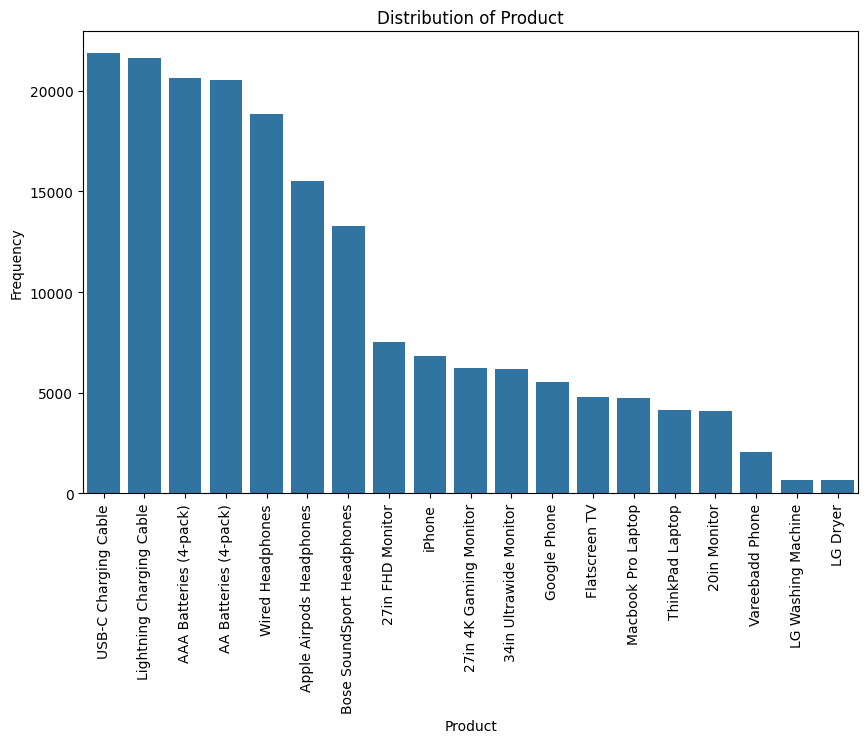

: 

In [57]:

# Visualize distributions using bar plots
for var in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=full_year_data, x=var, order=full_year_data[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()


### Bivariate Analysis

In [ ]:
# Numeric-Numeric Relationship: Correlation Matrix
numeric_vars = ['quantity_ordered', 'price_each']
numeric_corr = fully_year_data[numeric_vars].corr()


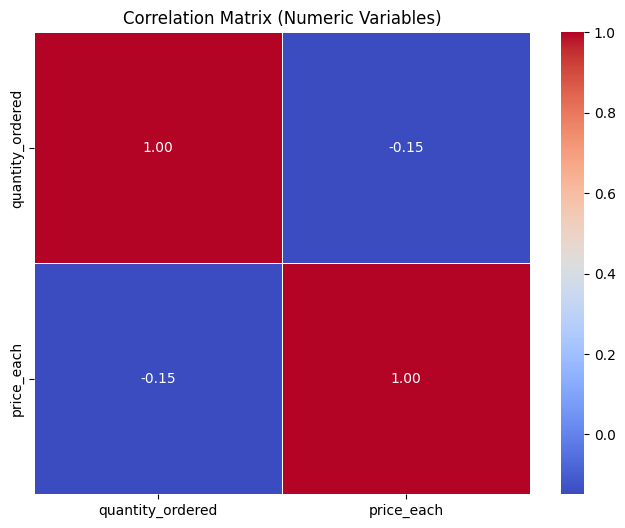

In [ ]:

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numeric Variables)')
plt.show()

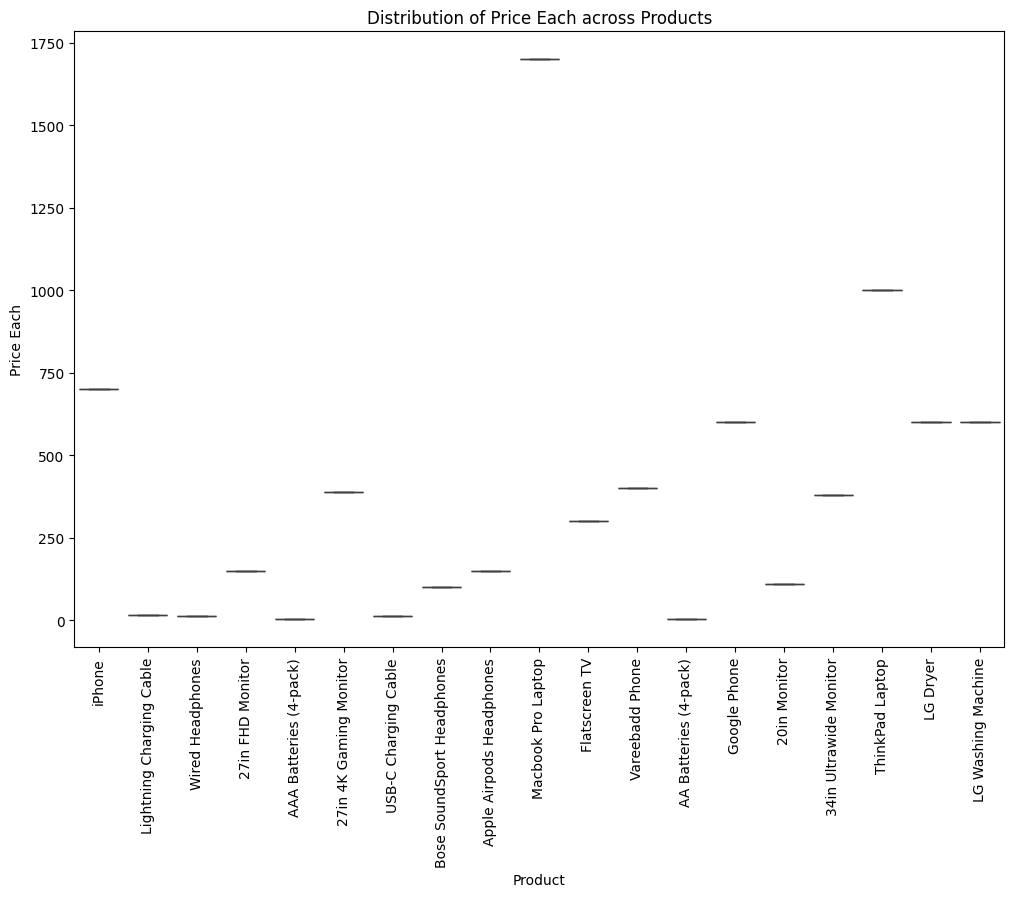

In [ ]:
# Categorical-Numeric Relationship: Example with 'product' and 'price_each'
plt.figure(figsize=(12, 8))
sns.boxplot(data=fully_year_data, x='product', y='price_each')
plt.title('Distribution of Price Each across Products')
plt.xlabel('Product')
plt.ylabel('Price Each')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Categorical-Categorical Relationship: Example with 'product' and 'purchase_address'
contingency_table = pd.crosstab(fully_year_data['product'], fully_year_data['purchase_address'])
print("Contingency Table:")
print(contingency_table)


Contingency Table:
purchase_address            1 11th St, Atlanta, GA 30301  \
product                                                    
20in Monitor                                           0   
27in 4K Gaming Monitor                                 0   
27in FHD Monitor                                       0   
34in Ultrawide Monitor                                 0   
AA Batteries (4-pack)                                  0   
AAA Batteries (4-pack)                                 0   
Apple Airpods Headphones                               0   
Bose SoundSport Headphones                             0   
Flatscreen TV                                          0   
Google Phone                                           0   
LG Dryer                                               0   
LG Washing Machine                                     0   
Lightning Charging Cable                               0   
Macbook Pro Laptop                                     0   
ThinkPad Laptop      